# Time Series Forecasting with ARIMA

Feng Li

School of Statistics and Mathematics

Central University of Finance and Economics

[feng.li@cufe.edu.cn](mailto:feng.li@cufe.edu.cn)

[https://feng.li/python](https://feng.li/python)

## ARIMA models

- Have been a popular forecasting tool since the 1970s 
- Why do they work?
  - ARMA is a flexible and parsimonious way to represent any stationary time series.
  - Non-stationary data can be differenced to make it stationary (hence ARIMA).  
  - Maximum likelihood can be used to estimate stationary ARMA models. 
  - Forecasts from such models are easy to generate.
- First question: What is stationarity?

## Expectations in time series

- Consider the time series

$$Y_1,Y_2,\dots,Y_T$$

- What do we mean by the expected value $E(Y_t)$?

- Let the density of $Y_t$ be $f_{Y_t}$. The expected value is given by

$$E(Y_t)=\int y_tf_{Y_t}(y_t)dy_t$$

- This is the *unconditional* expected value.


## An Illustration

- Imagine $I$ multiverses each with different realisations of the time series

$$\begin{aligned}\textrm{Multiverse 1:}\,&y^{(1)}_1,y^{(1)}_2\dots, y^{(1)}_t,\dots,y^{(1)}_{T}\\\textrm{Multiverse 2:}\,& y^{(2)}_1,y^{(2)}_2\dots, y^{(2)}_t,\dots,y^{(2)}_{T}\\&\vdots\quad\vdots\quad\vdots\quad\vdots\quad\vdots\quad\vdots\\\textrm{Multiverse I:}\,& y^{(I)}_1,y^{(I)}_2\dots, y^{(I)}_t,\dots,y^{(I)}_{T}\end{aligned}$$

- Let the number of multiverses go to infinity and average observation $t$ over each multiverse.

$$E(Y_t)=\underset{I\rightarrow\infty}{\lim}\frac{1}{I}\sum\limits_{i=1}^{I}y^{(i)}_t$$

## Other concepts

For *some* time series the following holds

$$E(Y_t)=\underset{T\rightarrow\infty}{\lim}\frac{1}{T}\sum\limits_{t=1}^{T}y^{(i)}_t$$

These time series are called **ergodic for the mean**. 

Also do not confuse *conditional* and *unconditional* expections, i.e.

$$E(Y_t)\,\textrm{ is not equivalent to }\,E(Y_t|Y_{t-1},Y_{t-2},\dots)$$


## Variance and (Auto-)Covariance in Time Series

- The variance of $Y_t$ is given by

$$\textrm{Var}(Y_t)=E\left[(y_t-\mu_t)^2\right]$$

- Here $\mu_t=E(Y_t)$ is just shorthand

- The covariance between $Y_t$ and $Y_{t-k}$ is given by

$$\textrm{Cov}(Y_t,T_{t-k})=E\left[(y_t-\mu_t)(y_{t-k}-\mu_{t-k})\right]$$

- Together, the variance and covariance make up the first two *moments* of the time series.
- Both can be defined using an integral, but also via the "multiverses" thought experiment.

## Variance Covariance Matrix

It is often convenient to put all variances and covariances into a matrix

$$\textrm{Var-Cov}(\mathbf{Y})=\begin{bmatrix}\textrm{Var}(Y_1) & \textrm{Cov}(Y_1,Y_2) &\cdots& \textrm{Cov}(Y_1,Y_T) \\ \textrm{Cov}(Y_1,Y_2)&\textrm{Var}(Y_2) &\cdots& \textrm{Cov}(Y_2,Y_T)\\\vdots&\vdots&\ddots&\vdots \\\textrm{Cov}(Y_1,Y_T)&\textrm{Cov}(Y_2,Y_T) &\cdots& \textrm{Var}(Y_T)\end{bmatrix}$$

This is called the *variance-covariance* matrix.

## Autocorrelation function

- Correlations are covariances divided by square root of variance.
- The correlation as a function of $k$ is known as the **autocorrelation function (ACF)**.
- This gives an indication of the relationship between $Y_t$ and $Y_{t-k}$.
- The autocorrelation function can be estimated from a sample of data.

## Partial autocorrelation function

- A similar concept is partial autocorrelation.
- This is a conditional expectation

$$E\left[(Y_{t}-\mu_t)(Y_{t-k}-\mu_{t-k})|Y_{t-1},Y_{t-2},\dots,Y_{t-k+1}\right]$$

- This is the "pure" effect of $Y_{t-k}$ on $Y_t$ controlling for all intervening observations.
- It can be understood by analogy to a regression model.

## Weak Stationarity 

If the following properties hold:

  - $E(Y_t)=\mu$: Expected value not a function of time
  - $V(Y_t)=\sigma^2$: Variance not a function of time
  - $V(Y_t,Y_{t-k})=\gamma_k$: Covariance not a function of time (It can be a function of $k$)

Then a series is *weakly (or covariance) stationary*

## Strong stationarity


If the following property holds:

$$f(Y_{t},Y_{t+{j_1}},Y_{t+{j_1}},\dots,Y_{t+{j_n}}) \textrm{ only depends on } (j_1,j_2,\dots,j_n) \textrm { and not on time}$$
 
Then a series is *strongly stationary*

- Strong stationarity always implies weak stationarity.
- The reverse is true for Gaussian distributions but not in general.

## Examples

Consider two processes: 

- $Y_t=0.2\times t+\epsilon_t$

- $Y_t=\sum\limits_{i=1}^t\epsilon_i$

In both cases $\epsilon_t\overset{i.i.d}\sim N(0,\sigma^2)$

## Example 1

For the first process

$$\begin{aligned}E(Y_t)&=E(0.2t+\epsilon_t)\\&=E(0.2t)+E(\epsilon_t)\\&=0.2t+0=0.2t\end{aligned}$$

Expected value depends on time. The series is nonstationary

Your turn: does the variance depend on time?

## Example 2

For the second process:

$$\begin{aligned}E(Y_t)&=E\left(\sum\limits_{i=1}^t\epsilon_i\right)\\&=\sum\limits_{i=1}^tE(\epsilon_i)\\&=\sum\limits_{i=1}^t0=0\end{aligned}$$

Your turn: does the variance depend on time? Is this stationary or nonstationary?

## Simulation: Example 1

In [1]:
import numpy as np
T=200
I=8
y_ex1 = np.random.standard_normal((I,T)) 
trend = 0.2*(np.arange(0,T)+1)
for i in range(I):
    y_ex1[i,] = y_ex1[i,] + trend
import matplotlib.pyplot as plt 

## Plots: Example 1

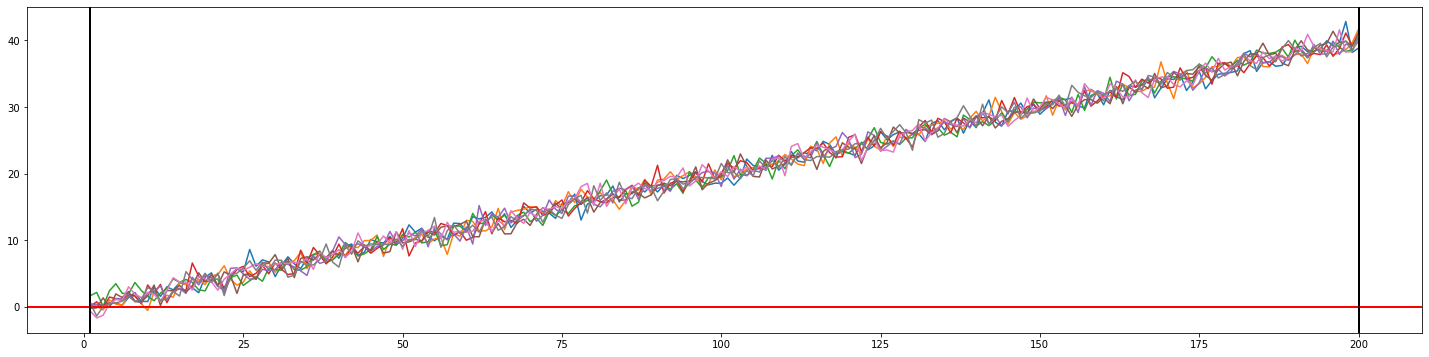

In [2]:
fig, ax = plt.subplots(figsize=(25, 6))
for i in range(I):
    #ax = f.add_subplot(I/2, 2, i + 1)
    ax.plot(range(1,T+1),y_ex1[i,])
    ax.axhline(y=0,color='red')
    ax.axvline(x=T,color='black')
    ax.axvline(x=1,color='black')

## Simulation: Example 2

In [3]:
y_ex2 = np.random.standard_normal((I,T)) 
y_ex2 = np.cumsum(y_ex2,1)

# Plots: Example 2

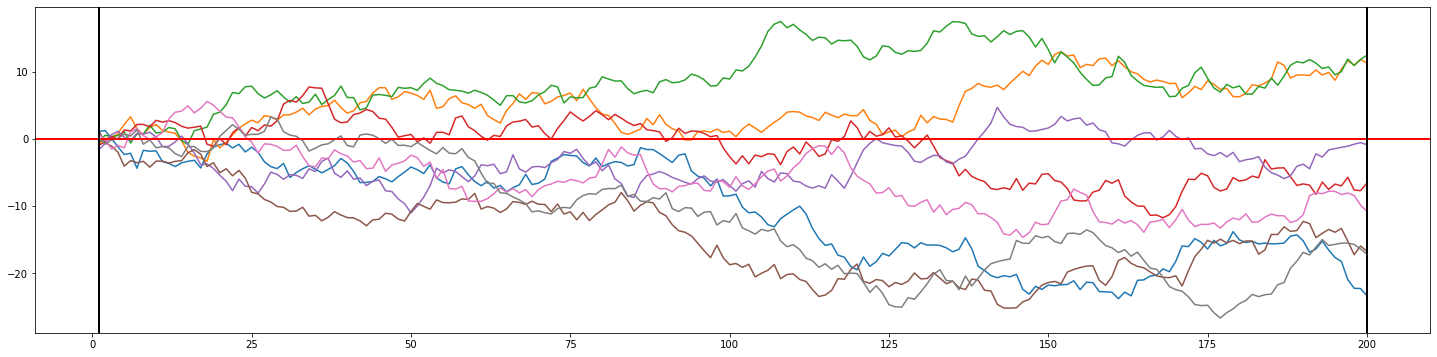

In [4]:
fig, ax = plt.subplots(figsize=(25, 6))
for i in range(I):
    #ax = f.add_subplot(I/2, 2, i + 1)
    ax.plot(range(1,T+1),y_ex2[i,])
    ax.axhline(y=0,color='red')
    ax.axvline(x=T,color='black')
    ax.axvline(x=1,color='black')
    

## Differencing

- It is much easier to handle stationary time series.
- However non-stationary series can be made stationary via differencing.
- Consider example 2 above

$$\begin{aligned}Y_t-Y_{t-1}&=\sum\limits_{i=1}^t\epsilon_i - \sum\limits_{i=1}^{t-1}\epsilon_i \\&=(\epsilon_t+\epsilon_{t-1}+\dots+\epsilon_1)-(\epsilon_{t-1}+\dots+\epsilon_1)\\&=\epsilon_t \end{aligned}$$ 

## Tests for stationarity

- With only one realisation of raw data, how can we determine whether the time series is stationary?
- Several hypothesis tests exist for this purpose
  - Augmented Dickey Fuller
  - KPSS Test
  - Phillips Perron
- For ADF null is that series are non-stationary, for KPSS and PP it is that they are stationary.

## Moving Average model

An MA(q) model is given by:

$Y_t=\epsilon_t+\theta_1\epsilon_{t-1}+\theta_2\epsilon_{t-2}+\dots+\theta_q\epsilon_{t-q}$

Or using lag operators:

$Y_t=(1+\theta_1L+\theta_2L^2+\dots+\theta_qL^q)\epsilon_t$

Or a more compact shorthand:

$Y_t=(1+\Theta(L))\epsilon_t$

We can (and often do) add an intercept, but I will leave it off for simplicity.

## Example

- You run a restaurant and sales is heavily influenced by vouchers issued by third parties.
- You do not observe the number of vouchers issued so treat it as random.
- The voucher may be valid for two days.  There is  
  - an instantaneous effect of vouchers issued on sales, and 
  - a 'discount' factor for the effect of vouchers on the second day.
$$\textrm{Sales}_t=\textrm{Voucher Effect}_t+\theta\textrm{Voucher Effect}_{t-1}$$


## Simulation

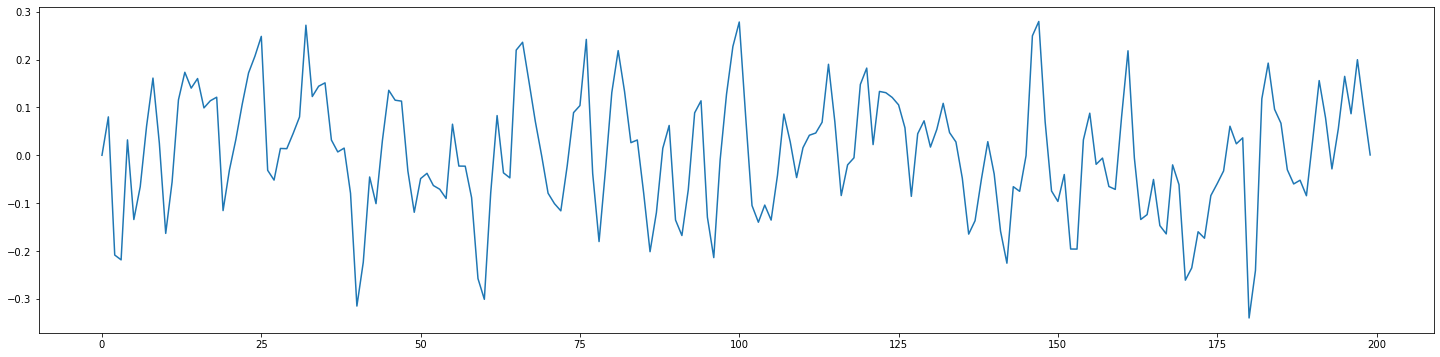

In [6]:
T=200
y=np.zeros(T)
epsilon=np.random.normal(0,0.1,T)
for i in range(1,T):
    y[i]=epsilon[i]+0.8*epsilon[i-1]
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(np.arange(T),y)

## ACF and PACF of MA

/usr/lib/python3/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


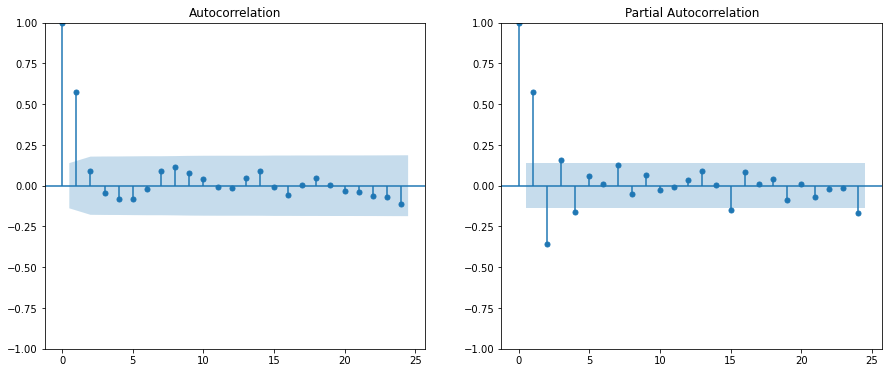

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1,2,figsize=(15,6))
plot_acf(y,ax=ax[0])
plot_pacf(y,ax=ax[1])
plt.show()

## ACF and PACF in theory

- The ACF is zero beyond lag $q$ for an MA(q).
- The PACF is decays more slowly.
- Remember what we see in the plots are *sample estimates*. But even then
  - The ACF is not significantly different from zero after lag $q$.
  - The PACF does have significant zeros after lag $q$

## Wold's Theorem

- It holds that *any* stationary process can be represented as an MA($\infty$) by **Wold's Theorem**.
- Even a process that is non-linear can be written as a *linear* combination of *past* errors.
  - Linear is good due to ease of estimation
  - Past errors are good since the model can be used for forecasting
- The disadvantage is that a finite order MA is restrictive.
  - For example the ACF is zero past laq $q$
- Is there another simple model that has an non-zero ACF up to infinite order?


## Autoregressive model

An AR(p) model is given by

$Y_t=\phi_1Y_{t-1}+\phi_2Y_{t-2}+\dots+\phi_pY_{t-p}+\epsilon_t$

Or using lag operators

$(1-\phi_1L-\phi_2L^2-\dots-\phi_pL^p)Y_t=\epsilon_t$

Or a more compact shorthand

$(1-\Phi(L))Y_t=\epsilon_t$

## Example

- Consider the restaurant's price for a bowl of noodle soup. This will be influenced by factors unobserved to the restaurant owner, e.g. the price of noodles, changes to rent, gas bills, etc.
- However, the restaurant doesn't want to change the price dramatically, so the previous price will also have an important effect of the current price.

$$\textrm{Price}_t=\phi \textrm{Price}_{t-1}+\text{Other Shocks}_t$$

- This is an AR(1) model.

## Simulation

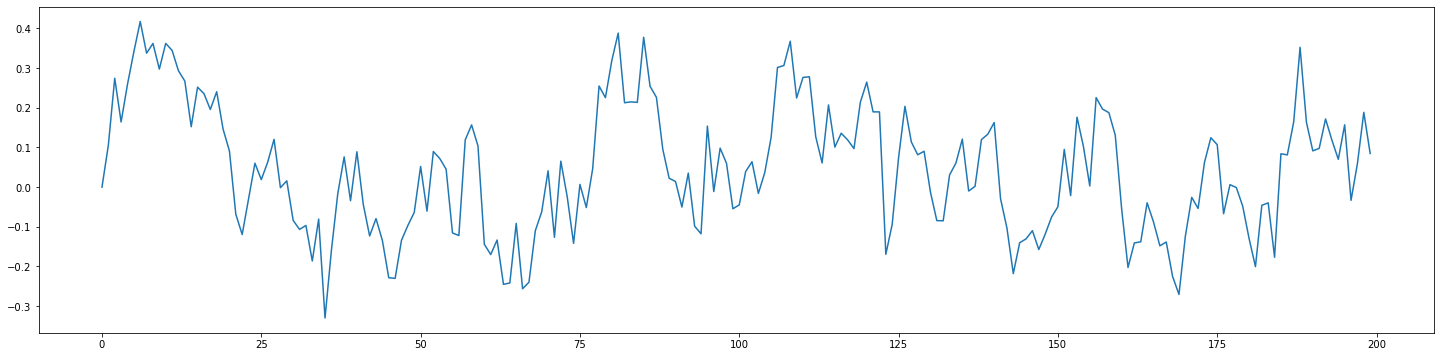

In [8]:
T=200
y=np.zeros(T)
epsilon=np.random.normal(0,0.1,T)
for i in range(1,T):
    y[i]=0.8*y[i-1]+epsilon[i]
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(np.arange(T),y)

## ACF and PACF of AR

/usr/lib/python3/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


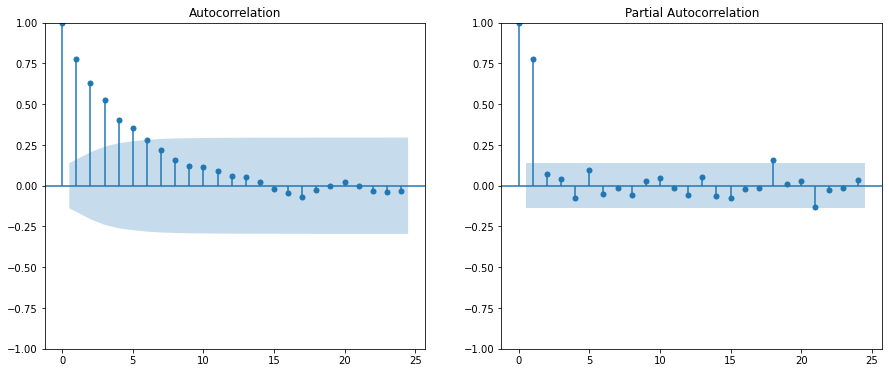

In [10]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
plot_acf(y,ax=ax[0])
plot_pacf(y,ax=ax[1])
plt.show()

## ACF and PACF in theory

- The PACF is zero beyond lag $p$ for an AR(p).
- The ACF decays more slowly.
- Remember what we see in the plots are *sample estimates*. But even then
  - The PACF is not significantly different from zero after lag $p$.
  - The ACF does have significant zeros after lag $p$

## Looking for more flexibility

- The AR model implies zeros past some point in the PACF
- The MA model implies zeros past some point in the ACF
- Is there is a more flexible model that 
  - Keeps a finite number of parameters
  - Does not constrain the ACF and PACF 

## ARMA model

An ARMA(p,q) model is given by:

$Y_t=\phi_1Y_{t-1}+\phi_2Y_{t-2}+\dots+\phi_pY_{t-p}+\epsilon_t+\theta_1\epsilon_{t-1}+\theta_2\epsilon_{t-2}+\dots+\theta_q\epsilon_{t-q}$

Or using lag operators:

$(1-\phi_1L-\phi_2L^2-\dots-\phi_pL^p)Y_t=(1+\theta_1L+\theta_2L^2+\dots+\theta_qL^q)\epsilon_t$

Or a more compact shorthand:

$(1-\Phi(L))Y_t=(1+\Theta(L))\epsilon_t$

- Your turn: simulate an ARMA(1,1) and find its ACF and PACF

## Simulation

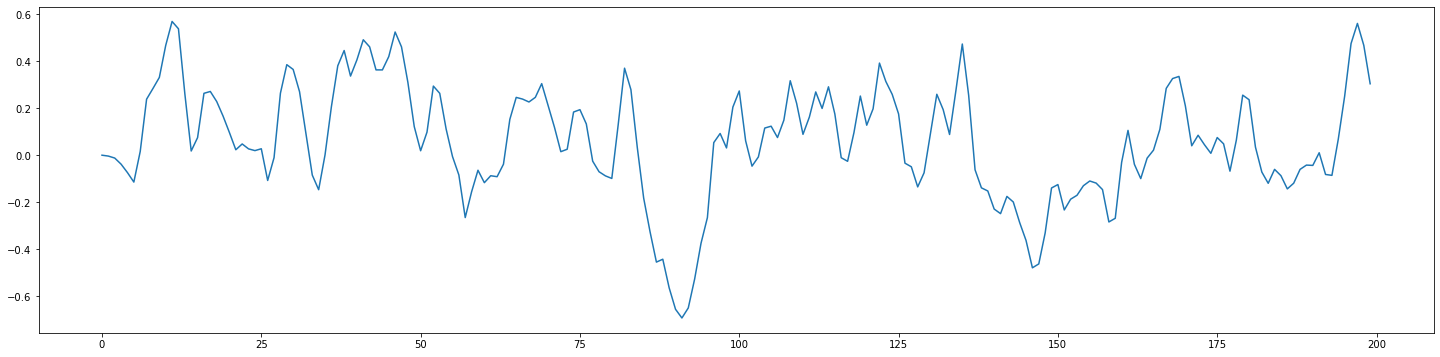

In [11]:
T=200
y=np.zeros(T)
epsilon=np.random.normal(0,0.1,T)
for i in range(1,T):
    y[i]=0.8*y[i-1]+epsilon[i]+0.7*epsilon[i-1]
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(np.arange(T),y)

## ACF and PACF of ARMA(1,1)

/usr/lib/python3/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


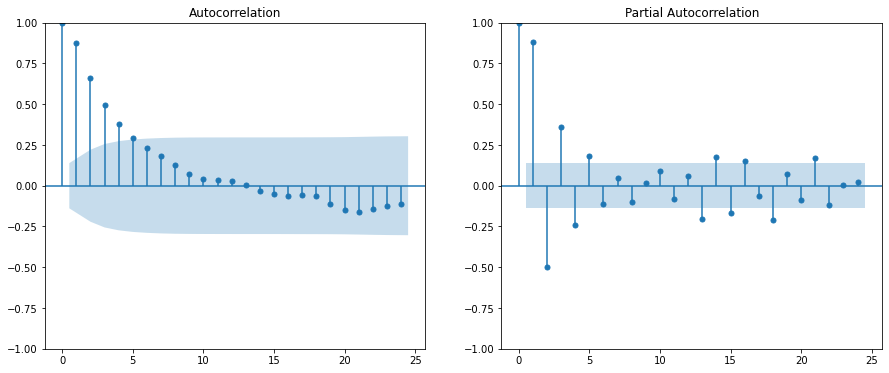

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1,2,figsize=(15,6))
plot_acf(y,ax=ax[0])
plot_pacf(y,ax=ax[1])
plt.show()

## Summarise

- Any stationary time series can be written as an MA($\infty$).
- ARMA models are a very flexible class of 
  - linear models with 
  - a finite number of parameters
  - that are very flexible
  - that can be easily estimated
  - and used for forecasting.
- This is the theoretical justification for ARIMA models.

## Putting `I` in ARIMA

- The above only applies to stationary series
- However we can difference data $d$ times to make data stationary. The final ARIMA model is

$$(1-\Phi(L))(1-L)^d Y_t=(1+\Theta(L))\epsilon_t$$

- We also write that a model is ARIMA(p,d,q) where 

  - $p$ is the number of AR terms
  - $d$ is the number of times we difference data
  - $q$ is the number of MA terms


## Box Jenkins

The Box Jenkins method has the following steps

- Use unit root tests to determine whether a series is non-stationary. 
  - If the series is non-stationary difference the series.
  - Keep going until the series is differenced enough to be stationary.
- Inspect the ACF and PACF. 
  - If the ACF is zero after some lag $q$ use an MA(q)
  - If the PACF is zero after some lag $p$ use an AR(p)
  - Otherwise use an ARMA model

## Problems with Box-Jenkins

- Looking at ACF and PACF plots is subjective.
- Difficult to apply to a large number of time series
- Multiple testing problems.
- Power can be low
- No good guide on selecting ARMA order.